In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import math
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, r2_score

from torch.utils.data import Dataset ,DataLoader

In [2]:
# 200 Samples
class AbsDataset(Dataset):
    
    def __init__(self, transform=None):
        xy = np.loadtxt('6Combinations.csv',delimiter=",", dtype=np.float32, skiprows=1)
        np.random.shuffle(xy)
        idx = np.random.randint(400, size=200)
        xy = xy[idx,:]
        self.x = xy[:,:6]
        self.y = xy[:,6:]
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
dataset = AbsDataset(transform=ToTensor())
composed = torchvision.transforms.Compose([ToTensor()])
dataset_new = AbsDataset(transform=composed)


# hyperparameters
input_size = 6
hidden_size = 400
hidden_size2 = 300
num_classes = 776
num_epochs = 1500
batch_size = 200
learning_rate = 0.001

# Dataset Prep for Training and Testing processes
train_size = int(0.7 * len(dataset_new)) # 70% of the samples for the training set
test_size = len(dataset_new) - train_size # 30% for the test set

# Train_loader (Shuffle) and Test_Loader (No Shuffle)
train_dataset, test_dataset = torch.utils.data.random_split(dataset_new, [train_size, test_size])
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, hidden_size2, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size2)
        self.l3 = nn.Linear(hidden_size2, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

model = NeuralNet(input_size, hidden_size, hidden_size2, num_classes)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the net
loss_per_iter = []
loss_per_batch = []
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs
        labels = labels
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + Optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Save loss to plot
        running_loss += loss.item()
        loss_per_iter.append(loss.item())
        
    loss_per_batch.append(running_loss / (i+1))
    running_loss = 0.0

dataiter = iter(test_loader)
inputs_200, labels_200 = dataiter.next()
inputs_200 = inputs_200
labels_200 = labels_200
outputs_200 = model(inputs_200)

In [3]:
# 300 Samples
class AbsDataset(Dataset):
    
    def __init__(self, transform=None):
        xy = np.loadtxt('6Combinations.csv',delimiter=",", dtype=np.float32, skiprows=1)
        np.random.shuffle(xy)
        idx = np.random.randint(400, size=300)
        xy = xy[idx,:]
        self.x = xy[:,:6]
        self.y = xy[:,6:]
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
dataset = AbsDataset(transform=ToTensor())
composed = torchvision.transforms.Compose([ToTensor()])
dataset_new = AbsDataset(transform=composed)


# hyperparameters
input_size = 6
hidden_size = 500
hidden_size2 = 500
num_classes = 776
num_epochs = 1500
batch_size = 200
learning_rate = 0.001

# Dataset Prep for Training and Testing processes
train_size = int(0.7 * len(dataset_new)) # 70% of the samples for the training set
test_size = len(dataset_new) - train_size # 30% for the test set

# Train_loader (Shuffle) and Test_Loader (No Shuffle)
train_dataset, test_dataset = torch.utils.data.random_split(dataset_new, [train_size, test_size])
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
model = NeuralNet(input_size, hidden_size, hidden_size2, num_classes)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the net
loss_per_iter = []
loss_per_batch = []
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs
        labels = labels
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + Optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Save loss to plot
        running_loss += loss.item()
        loss_per_iter.append(loss.item())
        
    loss_per_batch.append(running_loss / (i+1))
    running_loss = 0.0

dataiter = iter(test_loader)
inputs_300, labels_300 = dataiter.next()
inputs_300 = inputs_300
labels_300 = labels_300
outputs_300 = model(inputs_300)

In [4]:
# 400 Samples
class AbsDataset(Dataset):
    
    def __init__(self, transform=None):
        xy = np.loadtxt('6Combinations.csv',delimiter=",", dtype=np.float32, skiprows=1)
        self.x = xy[:,:6]
        self.y = xy[:,6:]
        self.n_samples = xy.shape[0]
        
        self.transform = transform
        
    def __getitem__(self, index):
        sample = self.x[index], self.y[index]
        
        if self.transform:
            sample = self.transform(sample)
        
        return sample
    
    def __len__(self):
        return self.n_samples

class ToTensor:
    def __call__(self, sample):
        inputs, targets = sample
        return torch.from_numpy(inputs), torch.from_numpy(targets)
    
dataset = AbsDataset(transform=ToTensor())
composed = torchvision.transforms.Compose([ToTensor()])
dataset_new = AbsDataset(transform=composed)


# hyperparameters
input_size = 6
hidden_size = 400
hidden_size2 = 400
num_classes = 776
num_epochs = 4000
batch_size = 200
learning_rate = 0.001

# Dataset Prep for Training and Testing processes
train_size = int(0.7 * len(dataset_new)) # 70% of the samples for the training set
test_size = len(dataset_new) - train_size # 30% for the test set

# Train_loader (Shuffle) and Test_Loader (No Shuffle)
train_dataset, test_dataset = torch.utils.data.random_split(dataset_new, [train_size, test_size])
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = examples.next()
model = NeuralNet(input_size, hidden_size, hidden_size2, num_classes)

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the net
loss_per_iter = []
loss_per_batch = []
for epoch in range(num_epochs):

    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        inputs = inputs
        labels = labels
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward + backward + Optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        # Save loss to plot
        running_loss += loss.item()
        loss_per_iter.append(loss.item())
        
    loss_per_batch.append(running_loss / (i+1))
    running_loss = 0.0

dataiter = iter(test_loader)
inputs_400, labels_400 = dataiter.next()
inputs_400 = inputs_400
labels_400 = labels_400
outputs_400 = model(inputs_400)

In [5]:
freq_range = range(48,1600,2)
torch.no_grad()
outputs_200 = outputs_200.detach().numpy()
outputs_300 = outputs_300.detach().numpy()
outputs_400 = outputs_400.detach().numpy()

In [6]:
# Three Datasets (200, 300 and 400 samples) Comparison Using Graphs
# Step 1. Tensor -> Numpy -> Tuple to find the same test input parameters
inputs_200 = inputs_200.numpy()
inputs_300 = inputs_300.numpy()
inputs_400 = inputs_400.numpy()
aset = set([tuple(x) for x in inputs_200])
bset = set([tuple(x) for x in inputs_300])
cset = set([tuple(x) for x in inputs_400])
intersected_input = np.array([x for x in aset & bset & cset])

In [7]:
print("Number of Intersected row is ", len(intersected_input))

Number of Intersected row is  2


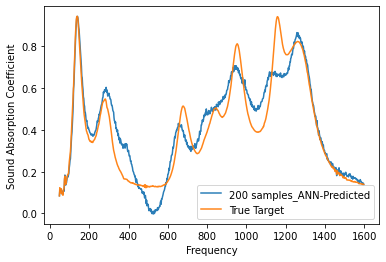

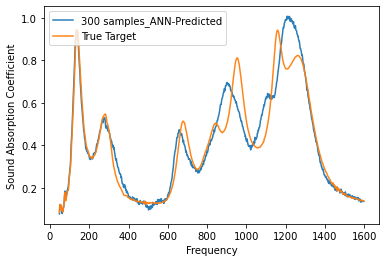

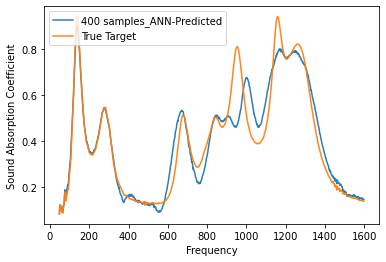

In [14]:
Input_of_Interest = intersected_input[1] # Type a number in the range from 0 to n-1 where n is given right above.
Input_of_Interest # You will need to re-start the code multiple times to obtain the intersected row for the three datasets

# Find the indexes for each dataset
index_200 = np.where(np.all(inputs_200==Input_of_Interest,axis=1))
index_300 = np.where(np.all(inputs_300==Input_of_Interest,axis=1))
index_400 = np.where(np.all(inputs_400==Input_of_Interest,axis=1))

# Comparison between True and Predicted Target Values 
plt.plot(freq_range, outputs_200[index_200[0][-1]], "-", alpha=14,label="200 samples_ANN-Predicted")
plt.plot(freq_range, labels_200[index_200[0][-1]], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.legend()
plt.show()

plt.plot(freq_range, outputs_300[index_300[0][-1]], "-", alpha=14,label="300 samples_ANN-Predicted")
plt.plot(freq_range, labels_300[index_300[0][-1]], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.legend()
plt.show()

plt.plot(freq_range, outputs_400[index_400[0][-1]], "-", alpha=14,label="400 samples_ANN-Predicted")
plt.plot(freq_range, labels_400[index_400[0][-1]], "-", alpha=14, label="True Target")
plt.xlabel("Frequency")
plt.ylabel("Sound Absorption Coefficient")
plt.legend()
plt.show()

In [9]:
# Regression
labels_200.tolist()
labels_300.tolist()
labels_400.tolist()
labels_200 = labels_200.numpy()
labels_300 = labels_300.numpy()
labels_400 = labels_400.numpy()

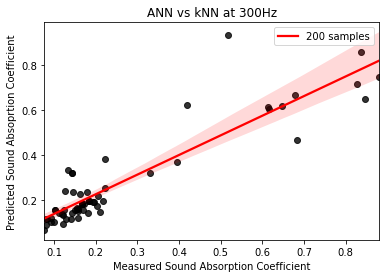

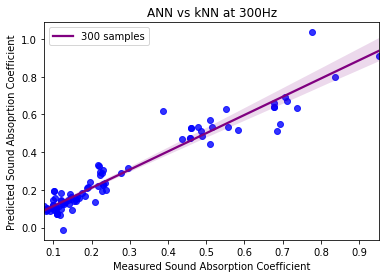

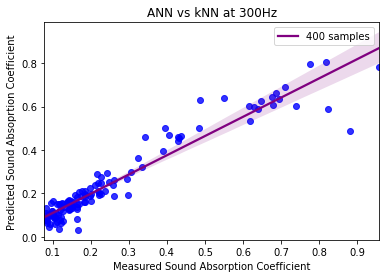

In [10]:
# 200 Samples
sns.regplot(x=labels_200[:,150], y= outputs_200[:,150], scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.legend(labels=["200 samples"])
plt.title("ANN vs kNN at 300Hz")
plt.show()

# 300 Samples
sns.regplot(x=labels_300[:,150], y= outputs_300[:,150], scatter_kws={"color": "blue"}, line_kws={"color": "purple"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.legend(labels=["300 samples"])
plt.title("ANN vs kNN at 300Hz")
plt.show()

# 400 Samples
sns.regplot(x=labels_400[:,150], y= outputs_400[:,150], scatter_kws={"color": "blue"}, line_kws={"color": "purple"})
plt.xlabel("Measured Sound Absorption Coefficient")
plt.ylabel("Predicted Sound Absoprtion Coefficient")
plt.legend(labels=["400 samples"])
plt.title("ANN vs kNN at 300Hz")
plt.show()

In [11]:
examples = iter(train_loader)
samples, labels = examples.next()
model = NeuralNet(input_size, hidden_size, hidden_size2, num_classes)

In [12]:
train_size = int(0.7 * len(dataset_new))

In [13]:
train_size

280